# IMDB Movies - Exploratory Data Analysis (EDA)

This notebook contains comprehensive EDA of the IMDB movies dataset, covering:
1. Rating Distribution
2. Votes Distribution (Popularity)
3. Ratings vs. Votes
4. Ratings by Genre
5. Ratings by Decade
6. Number of Movies per Decade
7. Genre Evolution Over Time
8. Runtime vs. Rating

In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Libraries imported successfully!")

Libraries imported successfully!


In [28]:
# Load the processed data
df = pd.read_csv('../data/processed/imdb_movies_processed.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nColumn names: {df.columns.tolist()}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (337971, 54)

Column names: ['tconst', 'primaryTitle', 'originalTitle', 'titleType', 'isAdult', 'startYear', 'runtimeMinutes', 'genres', 'averageRating', 'numVotes', 'decade', 'revenue', 'budget', 'logBudget', 'logRevenue', 'profit', 'roi', 'primaryGenre', 'numGenres', 'logVotes', 'bayes_rating', 'runtime_bin', 'genre_Action', 'genre_Adult', 'genre_Adventure', 'genre_Animation', 'genre_Biography', 'genre_Comedy', 'genre_Crime', 'genre_Documentary', 'genre_Drama', 'genre_Family', 'genre_Fantasy', 'genre_Horror', 'genre_Other', 'genre_Romance', 'genre_Thriller', 'genre_Unknown', 'genre_Action.1', 'genre_Adult.1', 'genre_Adventure.1', 'genre_Animation.1', 'genre_Biography.1', 'genre_Comedy.1', 'genre_Crime.1', 'genre_Documentary.1', 'genre_Drama.1', 'genre_Family.1', 'genre_Fantasy.1', 'genre_Horror.1', 'genre_Other.1', 'genre_Romance.1', 'genre_Thriller.1', 'genre_Unknown.1']

First few rows:


,tconst,primaryTitle,originalTitle,titleType,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes,...,genre_Crime.1,genre_Documentary.1,genre_Drama.1,genre_Family.1,genre_Fantasy.1,genre_Horror.1,genre_Other.1,genre_Romance.1,genre_Thriller.1,genre_Unknown.1
0,tt0000009,Miss Jerry,Miss Jerry,movie,0,1894.0,45.0,Romance,5.2,232.0,...,False,False,False,False,False,False,False,True,False,False
1,tt0000147,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,movie,0,1897.0,100.0,"Documentary,News,Sport",5.3,577.0,...,False,True,False,False,False,False,False,False,False,False
2,tt0000335,Soldiers of the Cross,Soldiers of the Cross,movie,0,1900.0,40.0,"Biography,Drama",5.5,64.0,...,False,False,False,False,False,False,False,False,False,False
3,tt0000502,Bohemios,Bohemios,movie,0,1905.0,100.0,Unknown,3.3,26.0,...,False,False,False,False,False,False,False,False,False,True
4,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,movie,0,1906.0,70.0,"Action,Adventure,Biography",6.0,1037.0,...,False,False,False,False,False,False,False,False,False,False


## Rating Distribution
**Purpose**: Core measure of quality perception  
**Insight**: Shows audience rating bias (IMDb typically peaks around 6–7)

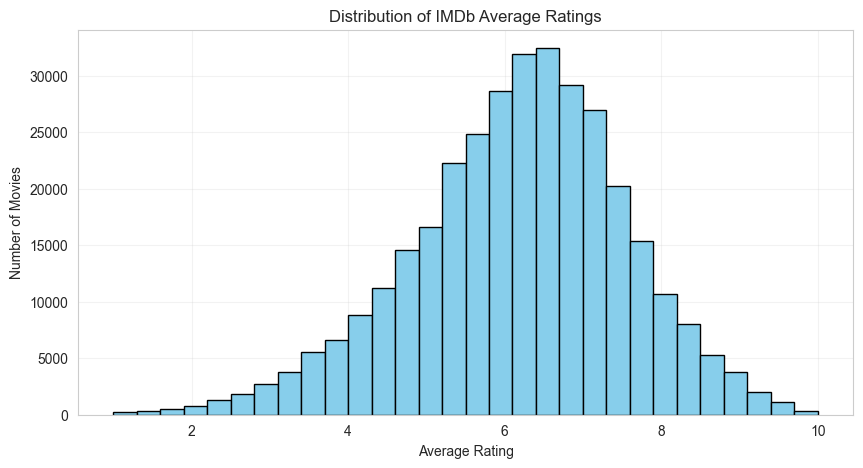

In [29]:
plt.figure(figsize=(10,5))

plt.hist(df['averageRating'].dropna(), bins=30, color='skyblue', edgecolor='black')

plt.title("Distribution of IMDb Average Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Number of Movies")
plt.grid(alpha=0.25)

plt.show()


## Votes Distribution (Popularity)
**Purpose**: Shows audience engagement  
**Insight**: Reveals skew — few movies get massive attention

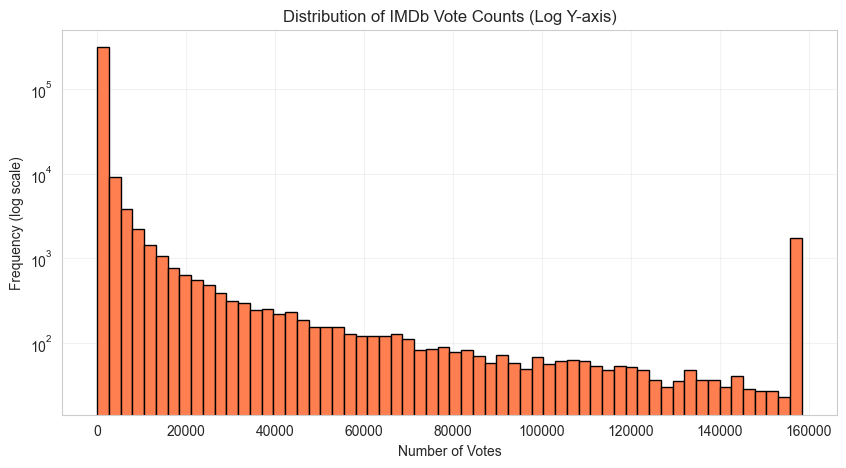

Vote Count Summary:
count    337971
mean       2464
std       14409
min           5
25%          20
50%          63
75%         320
max      158432
Name: numVotes, dtype: int64

Top 10 Most Voted Movies:
                          primaryTitle  startYear     numVotes  averageRating
3067                        Metropolis     1927.0  158432.8775            8.3
5091                       City Lights     1931.0  158432.8775            8.5
5302                                 M     1931.0  158432.8775            8.3
8838                      Modern Times     1936.0  158432.8775            8.5
9911   Snow White and the Seven Dwarfs     1937.0  158432.8775            7.6
11111               Gone with the Wind     1939.0  158432.8775            8.2
11641                 The Wizard of Oz     1939.0  158432.8775            8.1
11926               The Great Dictator     1940.0  158432.8775            8.4
12180                        Pinocchio     1940.0  158432.8775            7.5
12213           

In [30]:
plt.figure(figsize=(10,5))

plt.hist(df['numVotes'].dropna(), bins=60, edgecolor='black', color='coral')
plt.yscale('log')

plt.title("Distribution of IMDb Vote Counts (Log Y-axis)")
plt.xlabel("Number of Votes")
plt.ylabel("Frequency (log scale)")
plt.grid(alpha=0.25)

plt.show()

print("Vote Count Summary:")
print(df['numVotes'].describe().astype(int))

print("\nTop 10 Most Voted Movies:")
print(df.nlargest(10, 'numVotes')[['primaryTitle','startYear','numVotes','averageRating']])


## Ratings by Genre
**Purpose**: Identifies audience preferences  
**Insight**: Reveals which genres consistently perform better

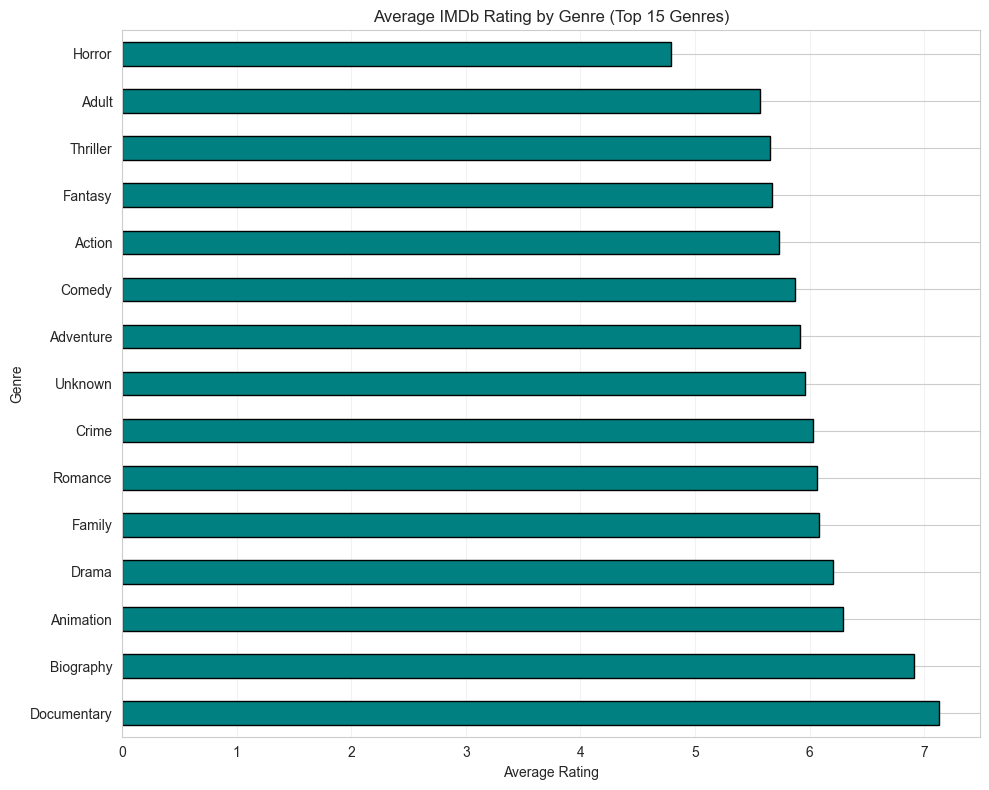

Mean Rating by Genre (Top 15 Genres):
primaryGenre
Documentary    7.13
Biography      6.91
Animation      6.29
Drama          6.20
Family         6.08
Romance        6.06
Crime          6.03
Unknown        5.96
Adventure      5.92
Comedy         5.87
Action         5.73
Fantasy        5.67
Thriller       5.65
Adult          5.57
Horror         4.79
Name: averageRating, dtype: float64


In [31]:
# Compute average rating per genre (Top 15 genres)
top_genres = df['primaryGenre'].value_counts().head(15).index
genre_stats = (
    df[df['primaryGenre'].isin(top_genres)]
    .groupby('primaryGenre')['averageRating']
    .mean()
    .sort_values(ascending=False)
    .round(2)
)

plt.figure(figsize=(10,8))
genre_stats.plot(kind='barh', color='teal', edgecolor='black')

plt.title("Average IMDb Rating by Genre (Top 15 Genres)")
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.grid(axis='x', alpha=0.25)

plt.tight_layout()
plt.show()

print("Mean Rating by Genre (Top 15 Genres):")
print(genre_stats)


## Ratings by Decade
**Purpose**: Captures temporal trends  
**Insight**: Shows if audience perception shifts over time

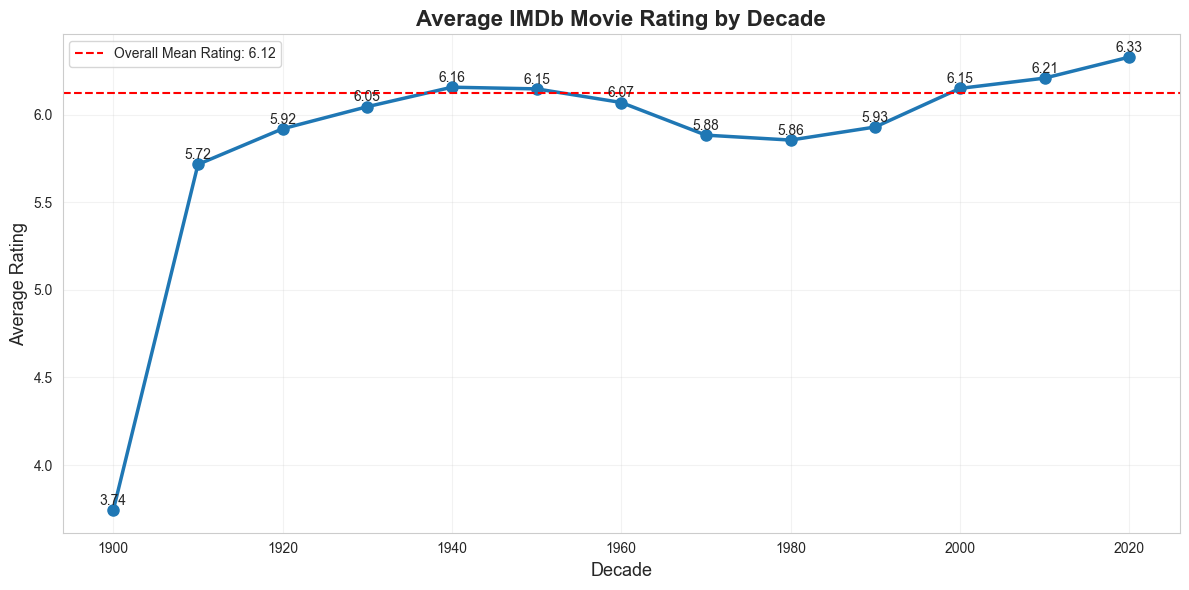


Mean Rating by Decade:
    decade  averageRating
1     1900       3.743200
2     1910       5.716048
3     1920       5.919457
4     1930       6.045499
5     1940       6.156707
6     1950       6.147171
7     1960       6.069396
8     1970       5.883049
9     1980       5.855001
10    1990       5.929639
11    2000       6.149788
12    2010       6.208579
13    2020       6.328400


In [32]:
# Compute average rating by decade
decade_ratings = (
    df.groupby('decade')['averageRating']
    .mean()
    .reset_index()
    .query("decade >= 1900")
)

plt.figure(figsize=(12,6))

plt.plot(
    decade_ratings['decade'], 
    decade_ratings['averageRating'], 
    marker='o', 
    markersize=8,
    linewidth=2.5, 
    color='#1f77b4',           # Professional blue
)

# Title and labels
plt.title("Average IMDb Movie Rating by Decade", fontsize=16, fontweight='bold')
plt.xlabel("Decade", fontsize=13)
plt.ylabel("Average Rating", fontsize=13)

# Add value labels on each point
for x, y in zip(decade_ratings['decade'], decade_ratings['averageRating']):
    plt.text(x, y + 0.03, f"{y:.2f}", ha='center', fontsize=10)

# Reference line = overall mean
overall_mean = df['averageRating'].mean()
plt.axhline(overall_mean, color='red', linestyle='--', linewidth=1.5,
            label=f'Overall Mean Rating: {overall_mean:.2f}')

plt.grid(True, alpha=0.25)
plt.legend()
plt.tight_layout()
plt.show()

print("\nMean Rating by Decade:")
print(decade_ratings)


##  Number of Movies per Decade
**Purpose**: Measures production growth  
**Insight**: Visualizes explosion of film output

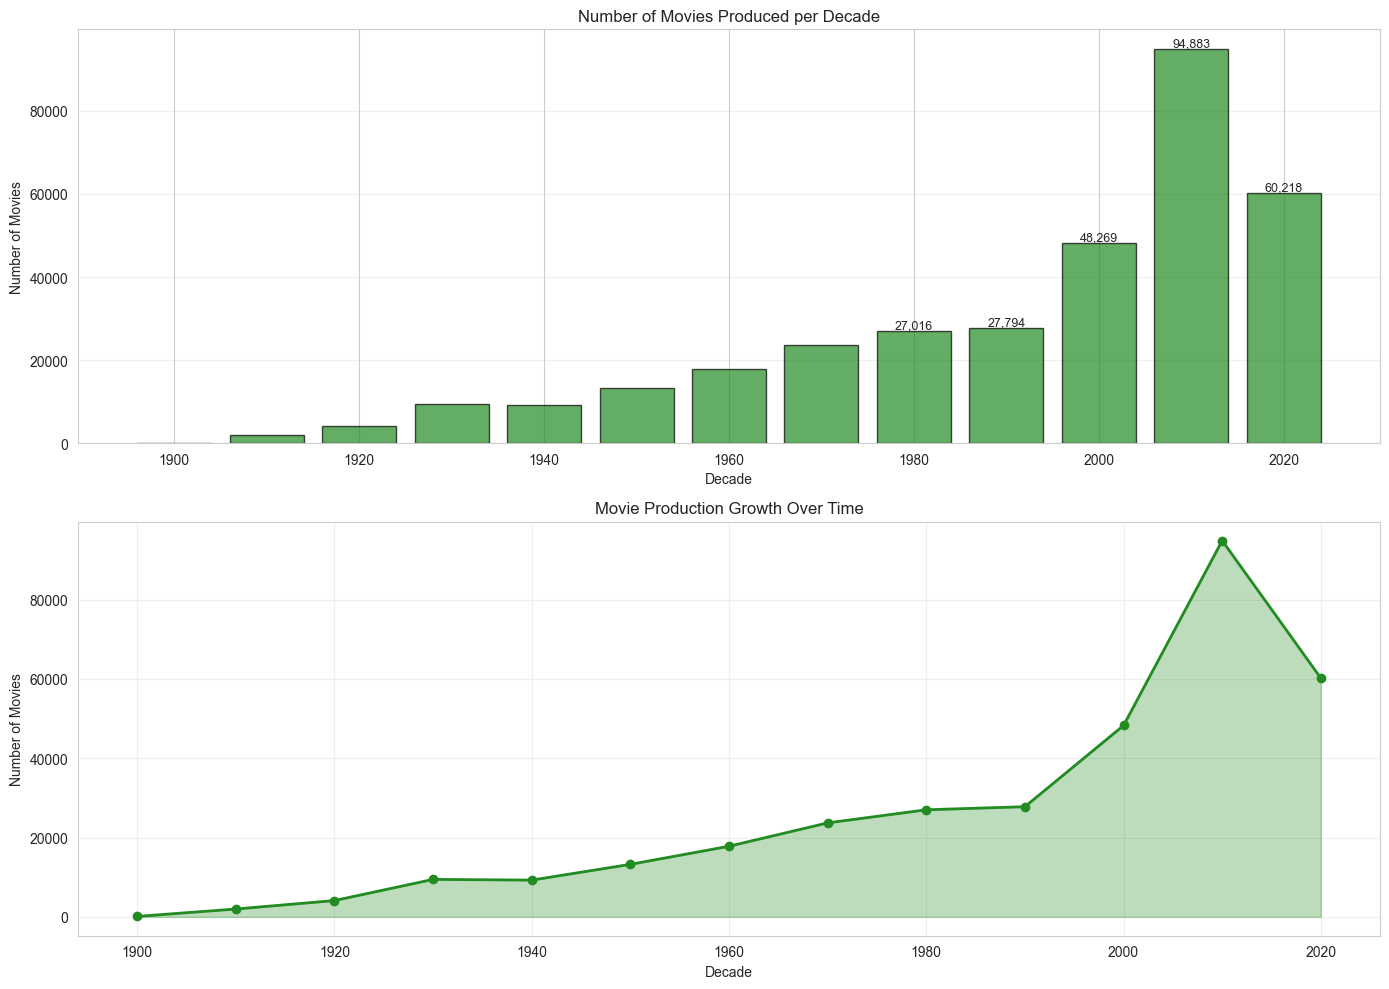

Movies per Decade:
        Count
decade       
1900      125
1910     1994
1920     4122
1930     9464
1940     9281
1950    13256
1960    17821
1970    23710
1980    27016
1990    27794
2000    48269
2010    94883
2020    60218

Total movies: 337,953
Peak decade: 2010 with 94,883 movies


In [33]:
# Count movies per decade
movies_per_decade = df['decade'].value_counts().sort_index()
movies_per_decade = movies_per_decade[movies_per_decade.index >= 1900]

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Bar chart
axes[0].bar(movies_per_decade.index, movies_per_decade.values, 
            width=8, edgecolor='black', alpha=0.7, color='forestgreen')
axes[0].set_xlabel('Decade')
axes[0].set_ylabel('Number of Movies')
axes[0].set_title('Number of Movies Produced per Decade')
axes[0].grid(True, alpha=0.3, axis='y')

# Add value labels on bars for recent decades
for decade in movies_per_decade.index[-5:]:
    count = movies_per_decade[decade]
    axes[0].text(decade, count, f'{count:,}', ha='center', va='bottom', fontsize=9)

# Line chart with growth rate
axes[1].plot(movies_per_decade.index, movies_per_decade.values, 
             marker='o', linewidth=2, markersize=6, color='forestgreen')
axes[1].set_xlabel('Decade')
axes[1].set_ylabel('Number of Movies')
axes[1].set_title('Movie Production Growth Over Time')
axes[1].grid(True, alpha=0.3)
axes[1].fill_between(movies_per_decade.index, movies_per_decade.values, alpha=0.3, color='forestgreen')

plt.tight_layout()
plt.show()

print("Movies per Decade:")
print(movies_per_decade.to_frame(name='Count'))
print(f"\nTotal movies: {movies_per_decade.sum():,}")
print(f"Peak decade: {movies_per_decade.idxmax()} with {movies_per_decade.max():,} movies")

## Genre Evolution Over Time
**Purpose**: Combines genre + time  
**Insight**: Answers "how have genres changed in popularity?"

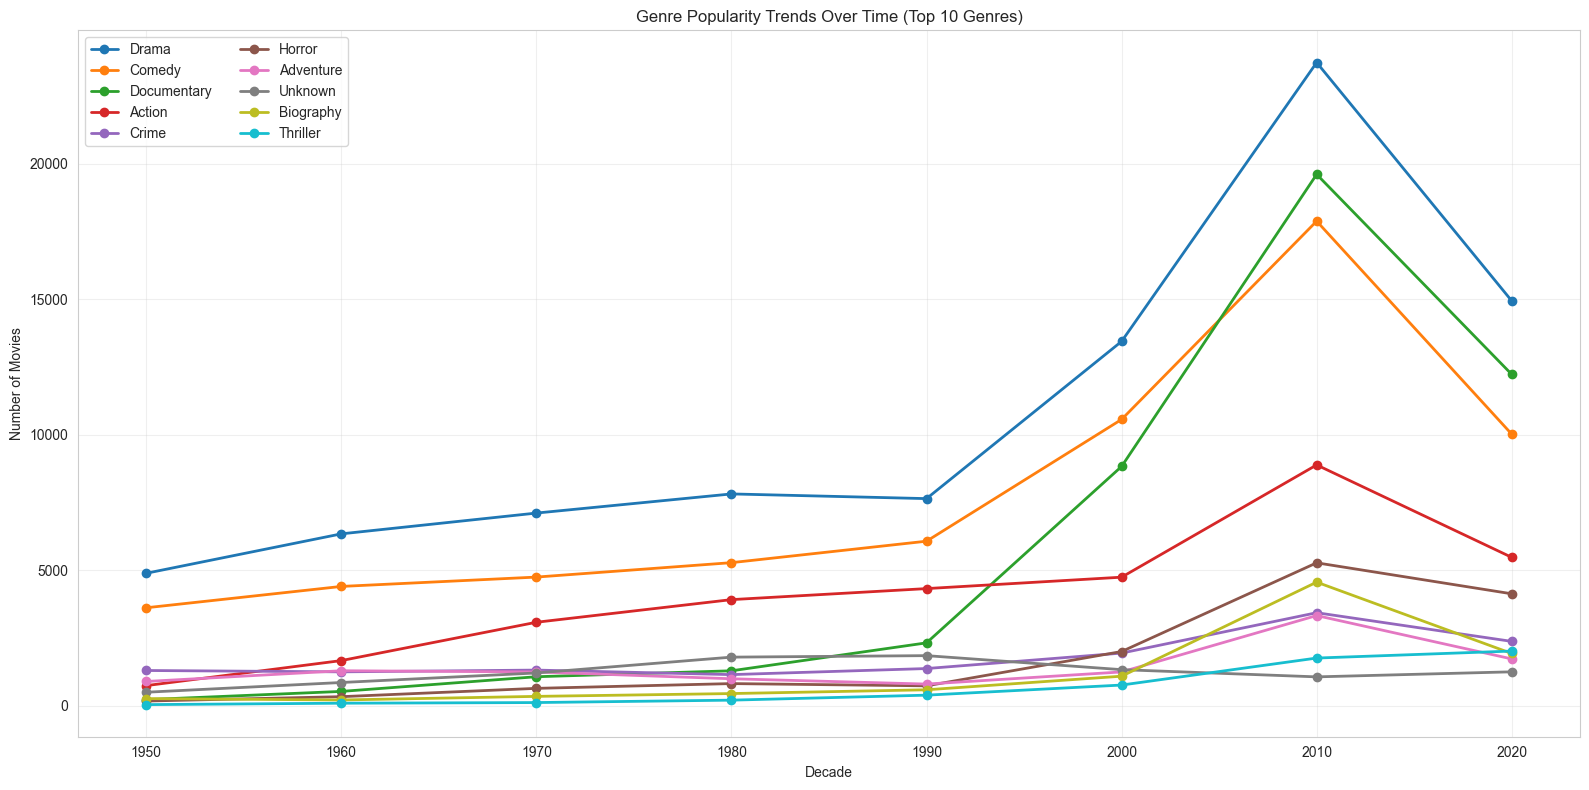

Genre counts by decade (Top 10 Genres, 1950 onwards):
decade        1950  1960  1970  1980  1990   2000   2010   2020
primaryGenre                                                   
Action         741  1664  3078  3913  4320   4741   8883   5473
Adventure      893  1289  1244   993   797   1245   3325   1725
Biography      261   210   343   447   586   1088   4558   1926
Comedy        3613  4400  4745  5277  6069  10562  17878  10018
Crime         1298  1248  1313  1146  1370   1940   3430   2372
Documentary    223   526  1068  1287  2318   8827  19604  12224
Drama         4886  6340  7107  7813  7640  13441  23731  14936
Horror         171   332   639   815   732   1998   5271   4128
Thriller        39    91   115   204   388    761   1757   2015
Unknown        496   855  1207  1791  1846   1329   1063   1249


In [34]:
# Create genre-decade crosstab (top 10 genres)
top_10_genres = df['primaryGenre'].value_counts().head(10).index
df_genre_time = df[df['primaryGenre'].isin(top_10_genres) & (df['decade'] >= 1950)]

genre_decade_counts = pd.crosstab(df_genre_time['primaryGenre'], df_genre_time['decade'])

plt.figure(figsize=(16, 8))

# Line plot showing trends
for genre in top_10_genres:
    genre_data = df_genre_time[df_genre_time['primaryGenre'] == genre]['decade'].value_counts().sort_index()
    plt.plot(genre_data.index, genre_data.values, marker='o', label=genre, linewidth=2)

plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.title('Genre Popularity Trends Over Time (Top 10 Genres)')
plt.legend(loc='best', ncol=2)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Genre counts by decade (Top 10 Genres, 1950 onwards):")
print(genre_decade_counts)


Correlation Analysis

Correlation Matrix:
                averageRating  numVotes  logVotes  runtimeMinutes  startYear  \
averageRating           1.000     0.068    -0.060           0.008      0.077   
numVotes                0.068     1.000     0.504           0.018      0.042   
logVotes               -0.060     0.504     1.000           0.035      0.056   
runtimeMinutes          0.008     0.018     0.035           1.000      0.016   
startYear               0.077     0.042     0.056           0.016      1.000   
numGenres              -0.052     0.172     0.392           0.011     -0.037   
logBudget               0.055     0.483     0.708           0.361     -0.079   
logRevenue              0.174     0.556     0.630           0.256     -0.062   

                numGenres  logBudget  logRevenue  
averageRating      -0.052      0.055       0.174  
numVotes            0.172      0.483       0.556  
logVotes            0.392      0.708       0.630  
runtimeMinutes      0.011      0.

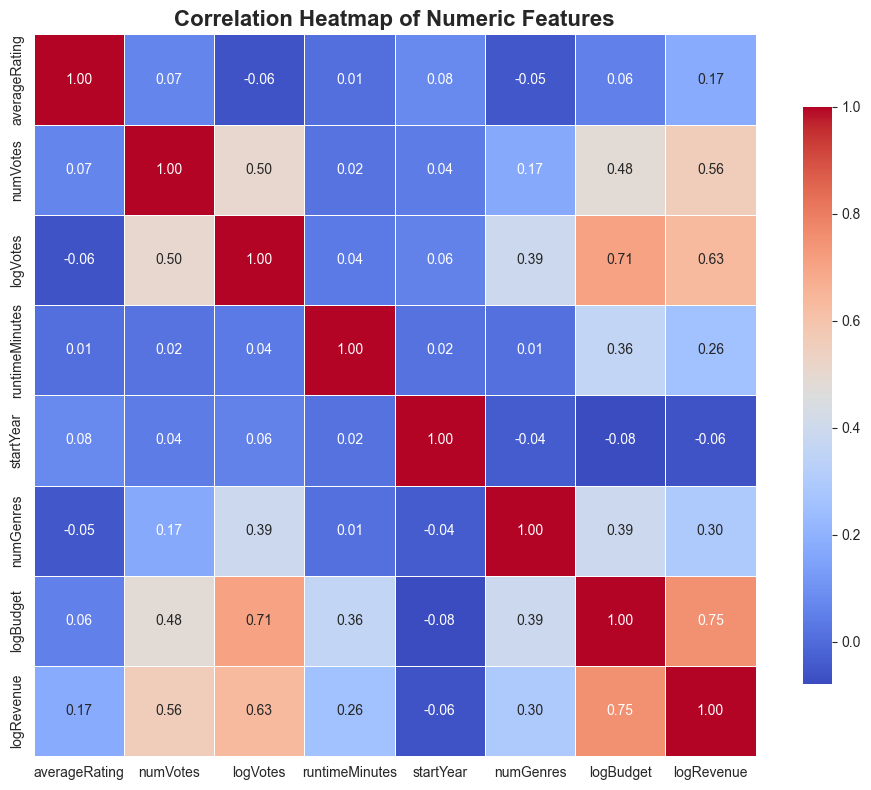


Key Correlations with Average Rating
logRevenue        0.174
startYear         0.077
numVotes          0.068
logBudget         0.055
runtimeMinutes    0.008
numGenres        -0.052
logVotes         -0.060
Name: averageRating, dtype: float64


In [35]:
print("="*80)
print("Correlation Analysis")
print("="*80)

# Select numeric columns (including budget/revenue)
numeric_cols = ['averageRating', 'numVotes', 'logVotes', 
                'runtimeMinutes', 'startYear', 'numGenres',
                'logBudget', 'logRevenue']

# Filter columns safely
numeric_cols = [col for col in numeric_cols if col in df.columns]

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr().round(3)

print("\nCorrelation Matrix:")
print(corr_matrix)

# Heatmap (clean, professional)
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    linewidths=0.5,
    square=True,
    fmt=".2f",
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Heatmap of Numeric Features", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Key correlations with averageRating
print("\n" + "="*80)
print("Key Correlations with Average Rating")
print("="*80)

rating_corr = corr_matrix['averageRating'].sort_values(ascending=False)
print(rating_corr.drop('averageRating'))

## Budget & Revenue Analysis
**Purpose**: Understand financial aspects of movies  
**Insight**: Reveals relationship between budget, revenue, and success

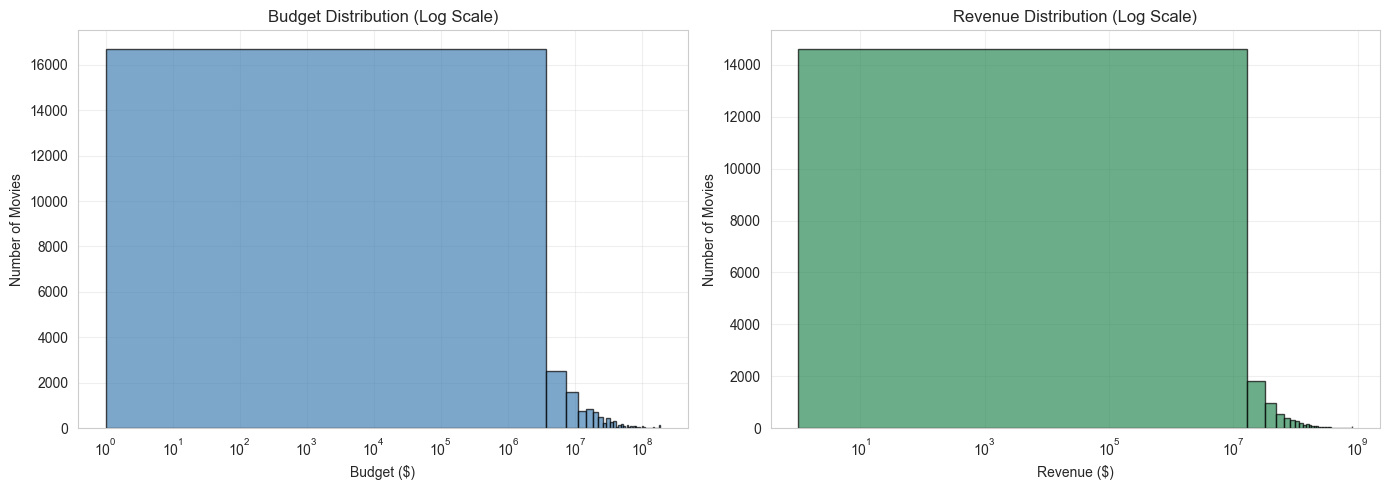

Movies with budget data: 26,752
Movies with revenue data: 20,618

Budget Summary:
count         $26,752
mean      $11,107,543
std       $25,593,446
min                $1
25%          $100,000
50%        $1,487,705
75%       $10,000,000
max      $185,000,000
Name: budget, dtype: object


In [36]:
# Budget Distribution (Log Scale)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Budget histogram
df_budget = df[df['budget'].notna() & (df['budget'] > 0)]
axes[0].hist(df_budget['budget'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_xscale('log')
axes[0].set_xlabel('Budget ($)')
axes[0].set_ylabel('Number of Movies')
axes[0].set_title('Budget Distribution (Log Scale)')
axes[0].grid(alpha=0.3)

# Revenue histogram
df_revenue = df[df['revenue'].notna() & (df['revenue'] > 0)]
axes[1].hist(df_revenue['revenue'], bins=50, color='seagreen', edgecolor='black', alpha=0.7)
axes[1].set_xscale('log')
axes[1].set_xlabel('Revenue ($)')
axes[1].set_ylabel('Number of Movies')
axes[1].set_title('Revenue Distribution (Log Scale)')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Movies with budget data: {len(df_budget):,}")
print(f"Movies with revenue data: {len(df_revenue):,}")
print(f"\nBudget Summary:")
print(df_budget['budget'].describe().apply(lambda x: f"${x:,.0f}"))

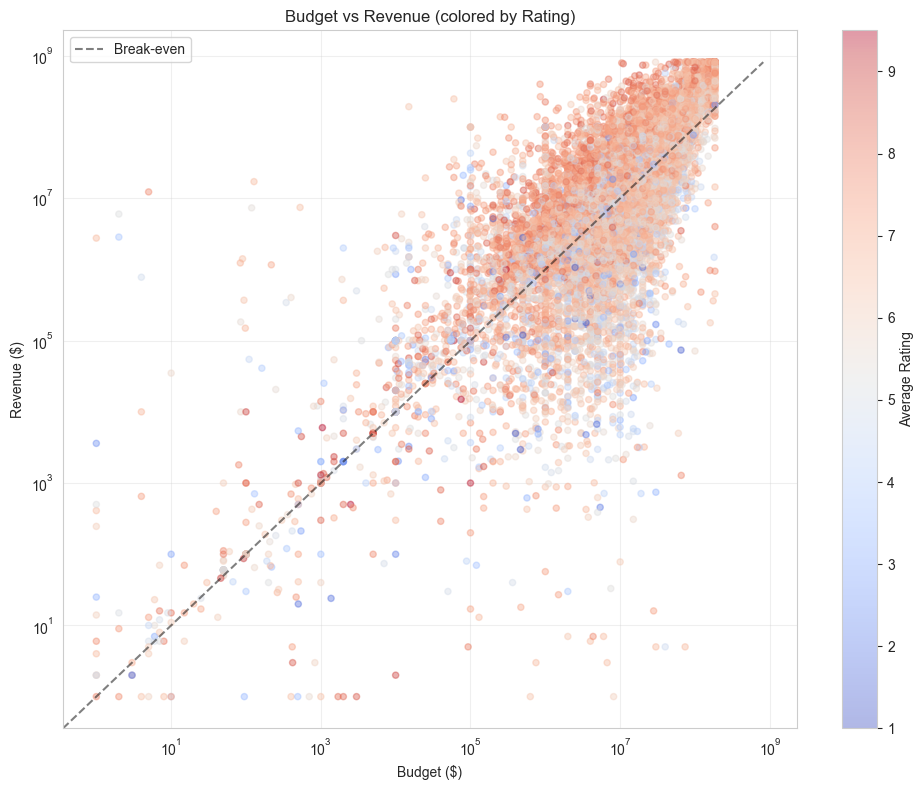

Profitable movies: 7,699 / 12,291 (62.6%)


In [37]:
# Budget vs Revenue Scatter Plot
df_financial = df[(df['budget'].notna()) & (df['revenue'].notna()) & (df['budget'] > 0) & (df['revenue'] > 0)]

plt.figure(figsize=(10, 8))
plt.scatter(df_financial['budget'], df_financial['revenue'], 
            alpha=0.4, c=df_financial['averageRating'], cmap='coolwarm', s=20)
plt.colorbar(label='Average Rating')

# Add break-even line
max_val = max(df_financial['budget'].max(), df_financial['revenue'].max())
plt.plot([0, max_val], [0, max_val], 'k--', alpha=0.5, label='Break-even')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Budget ($)')
plt.ylabel('Revenue ($)')
plt.title('Budget vs Revenue (colored by Rating)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate profitability stats
profitable = (df_financial['revenue'] > df_financial['budget']).sum()
total = len(df_financial)
print(f"Profitable movies: {profitable:,} / {total:,} ({profitable/total*100:.1f}%)")

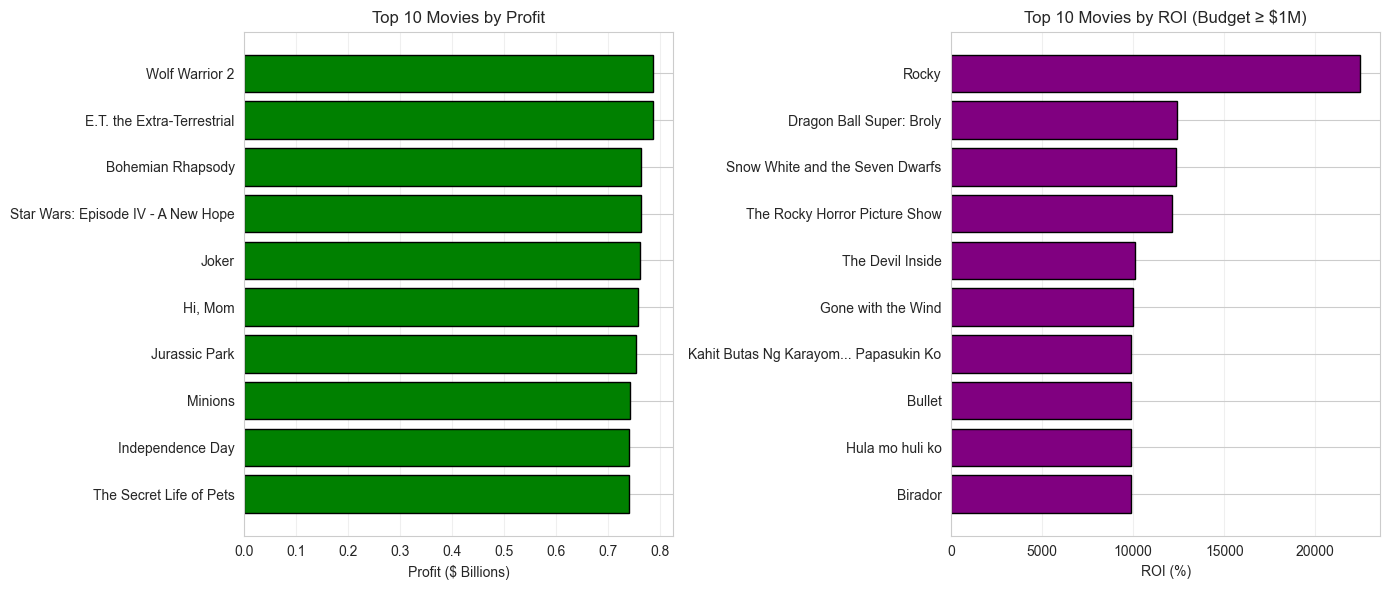

Top 10 by Profit:
                      primaryTitle  startYear       profit     budget      revenue
                    Wolf Warrior 2     2017.0 7.870553e+08 29700000.0 8.167553e+08
        E.T. the Extra-Terrestrial     1982.0 7.868074e+08 10500000.0 7.973074e+08
                 Bohemian Rhapsody     2018.0 7.647553e+08 52000000.0 8.167553e+08
Star Wars: Episode IV - A New Hope     1977.0 7.643980e+08 11000000.0 7.753980e+08
                             Joker     2019.0 7.617553e+08 55000000.0 8.167553e+08
                           Hi, Mom     2021.0 7.577553e+08 59000000.0 8.167553e+08
                     Jurassic Park     1993.0 7.537553e+08 63000000.0 8.167553e+08
                           Minions     2015.0 7.427553e+08 74000000.0 8.167553e+08
                  Independence Day     1996.0 7.417553e+08 75000000.0 8.167553e+08
           The Secret Life of Pets     2016.0 7.417553e+08 75000000.0 8.167553e+08

Top 10 by ROI:
                          primaryTitle  startYear    

In [38]:
# Top Movies by Profit and ROI
df_profit = df_financial.copy()
df_profit['profit'] = df_profit['revenue'] - df_profit['budget']
df_profit['roi'] = (df_profit['revenue'] - df_profit['budget']) / df_profit['budget'] * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Top 10 by Profit
top_profit = df_profit.nlargest(10, 'profit')[['primaryTitle', 'startYear', 'profit', 'budget', 'revenue']]
axes[0].barh(top_profit['primaryTitle'], top_profit['profit'] / 1e9, color='green', edgecolor='black')
axes[0].set_xlabel('Profit ($ Billions)')
axes[0].set_title('Top 10 Movies by Profit')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# Top 10 by ROI (min 1M budget to filter noise)
top_roi = df_profit[df_profit['budget'] >= 1e6].nlargest(10, 'roi')[['primaryTitle', 'startYear', 'roi', 'budget', 'revenue']]
axes[1].barh(top_roi['primaryTitle'], top_roi['roi'], color='purple', edgecolor='black')
axes[1].set_xlabel('ROI (%)')
axes[1].set_title('Top 10 Movies by ROI (Budget ≥ $1M)')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("Top 10 by Profit:")
print(top_profit.to_string(index=False))
print("\nTop 10 by ROI:")
print(top_roi.to_string(index=False))

In [1]:
# Average Rating by Budget Tier
df_financial['budget_tier'] = pd.cut(df_financial['budget'], 
                                      bins=[0, 1e6, 10e6, 50e6, 100e6, float('inf')],
                                      labels=['<$1M', '$1-10M', '$10-50M', '$50-100M', '>$100M'])
tier_rating = df_financial.groupby('budget_tier', observed=True)['averageRating'].mean()

axes[1].bar(tier_rating.index.astype(str), tier_rating.values, color='coral', edgecolor='black')
axes[1].set_xlabel('Budget Tier')
axes[1].set_ylabel('Average Rating')
axes[1].set_title('Average Rating by Budget Tier')
axes[1].grid(axis='y', alpha=0.3)

# Add values on bars
for i, v in enumerate(tier_rating.values):
    axes[1].text(i, v + 0.05, f'{v:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

print("Average Rating by Budget Tier:")
print(tier_rating.round(2))

NameError: name 'pd' is not defined

## Summary & Key Insights

This EDA reveals several important patterns in the IMDB movies dataset:

### Key Findings:
1. **Rating Distribution**: Ratings typically peak around 6-7, showing a slight positive bias
2. **Popularity Skew**: Most movies receive relatively few votes, with a small number becoming extremely popular
3. **Quality-Popularity Relationship**: Correlation analysis shows the relationship between votes and ratings
4. **Genre Preferences**: Different genres show distinct rating patterns
5. **Temporal Trends**: Movie production and ratings have evolved significantly over decades
6. **Production Growth**: Exponential growth in film production, especially in recent decades
7. **Genre Evolution**: Genre popularity has shifted dramatically over time
8. **Budget & Revenue**: Higher budgets don't guarantee higher ratings; profitability varies widely
9. **ROI Patterns**: Lower-budget films can achieve exceptional returns on investment